<a href="https://colab.research.google.com/github/kodai-utsunomiya/memorization-and-generalization/blob/main/memo_Simple_handling_of_pkl_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pickle
import os

# データセットの準備
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# 簡単なCNNモデル
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 訓練
num_epochs = 10
train_loss_list = []
train_acc_list = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in trainloader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_acc = 100 * correct / total

    train_loss_list.append(epoch_loss)
    train_acc_list.append(epoch_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

100%|██████████| 170498071/170498071 [00:02<00:00, 75445723.61it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/10, Loss: 1.4951, Accuracy: 46.39%
Epoch 2/10, Loss: 1.1457, Accuracy: 59.40%
Epoch 3/10, Loss: 1.0173, Accuracy: 64.22%
Epoch 4/10, Loss: 0.9298, Accuracy: 67.39%
Epoch 5/10, Loss: 0.8560, Accuracy: 70.16%
Epoch 6/10, Loss: 0.7982, Accuracy: 71.92%
Epoch 7/10, Loss: 0.7419, Accuracy: 74.02%
Epoch 8/10, Loss: 0.6935, Accuracy: 75.52%
Epoch 9/10, Loss: 0.6458, Accuracy: 77.28%
Epoch 10/10, Loss: 0.6031, Accuracy: 78.94%


In [ ]:
import pickle

save_path = 'training_data.pkl'
with open(save_path, 'rb') as f:
    data = pickle.load(f)

print(data)  # データを確認

{'train_loss': [1.4950816550254822, 1.145665231704712, 1.017291941165924, 0.9298256150484085, 0.8560123966932297, 0.7982031041383744, 0.7418901419043541, 0.6934562536478043, 0.6457503260374069, 0.6030685567259788], 'train_acc': [46.394, 59.4, 64.224, 67.388, 70.16, 71.924, 74.024, 75.516, 77.278, 78.944]}


In [ ]:
%matplotlib inline

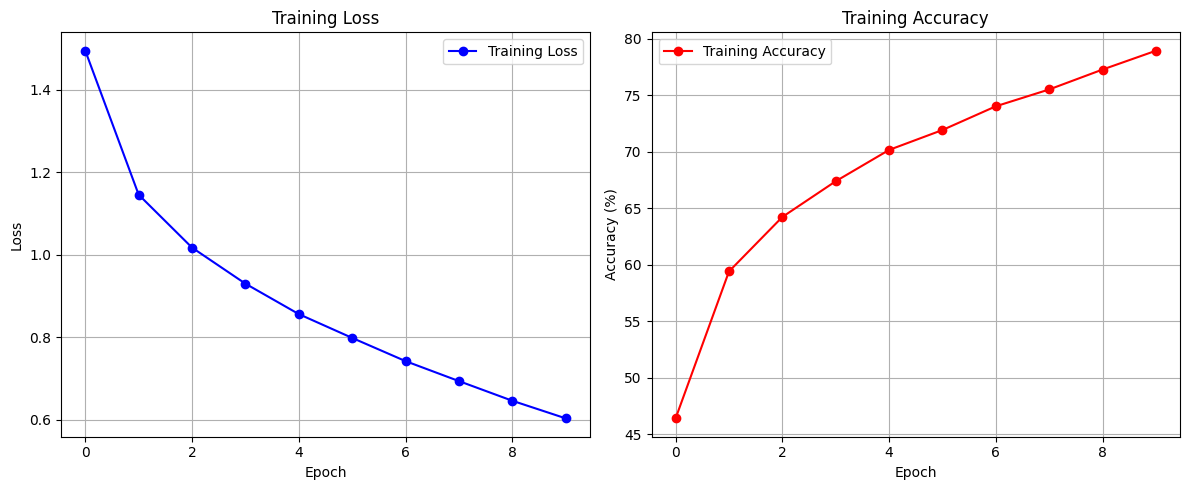

In [ ]:
import matplotlib.pyplot as plt

# 訓練データのロード
save_path = 'training_data.pkl'
with open(save_path, 'rb') as f:
    data = pickle.load(f)

train_loss_list = data['train_loss']
train_acc_list = data['train_acc']

# グラフの表示
plt.figure(figsize=(12, 5))

# 損失のプロット
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, marker='o', linestyle='-', color='b', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)

# 精度のプロット
plt.subplot(1, 2, 2)
plt.plot(train_acc_list, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()